In [1]:
ls

Checking_for_right_len_in_balance.ipynb
Junk - experimentation .ipynb
Junk - experimentation 2.ipynb
Junk - experimentation 3 - features & balance.ipynb
Untitled.ipynb
all_runner v1.ipynb
all_runner v1b.ipynb
all_runner v2.ipynb
balance junk v1.ipynb
current_errors_TopMcMr_20181006.png
mannville_demo_data/
predictionclasses v1.ipynb
test junk.ipynb
trainclasses junk v1.ipynb
trainclasses junk v2.ipynb


In [2]:
import pandas as pd
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

/Users/justingosses/anaconda/envs/predictatops/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/Users/justingosses/anaconda/envs/predictatops/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


In [3]:
cd ..

/Users/justingosses/Code/predictatops


In [4]:
ls


AAPG_Abstract_2019ACE.md
AUTHORS.rst
CONTRIBUTING.rst
HISTORY.rst
LICENSE
MANIFEST.in
Makefile
README.md
README.rst
__pycache__/
data/
demo/
docs/
environment.yml
environment_initial.yml
predictatops/
predictatops.egg-info/
requirements.txt
requirements_dev.txt
results/
results_higherBlanceAndLowerWindows_20190517/
results_higherBlanceAnd_20190517/
results_higherBlance_20190513/
setup.cfg
setup.py
tests/
tox.ini


In [5]:
cd predictatops/

/Users/justingosses/Code/predictatops/predictatops


In [6]:
import trainclasses 

In [7]:
import predictionclasses
from predictionclasses import loadMLinstanceAndModel

In [8]:
dir(loadMLinstanceAndModel)

['__annotations__',
 '__call__',
 '__class__',
 '__closure__',
 '__code__',
 '__defaults__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__get__',
 '__getattribute__',
 '__globals__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__kwdefaults__',
 '__le__',
 '__lt__',
 '__module__',
 '__name__',
 '__ne__',
 '__new__',
 '__qualname__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__']

In [9]:
import datetime
print(datetime.datetime.now())

2019-05-18 19:27:21.180030


# NOW MOVING TO predictionclasses.py file!

---------------

In [ ]:
#from all_runner import *

In [10]:
### starting again 
import datetime
print(datetime.datetime.now())


2019-05-18 19:27:26.069326


In [13]:
import sys
sys.path.append('../predictatops')

In [14]:
from predictionclasses import *

In [15]:
from predictionclasses_runner import *

NameError: name 'loadMLinstanceAndModel' is not defined

## CODE FOR predictionclasses

In [16]:

################ imports ###################
import pandas as pd
import numpy as np
import itertools
# import matplotlib.pyplot as plt
# %matplotlib inline
import welly
from welly import Well
import lasio
import glob
from sklearn import neighbors
import pickle
import math
import dask
import dask.dataframe as dd
from dask.distributed import Client
import random
from xgboost.sklearn import XGBClassifier
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
import multiprocessing

from main import getJobLibPickleResults
#### Adding this bit to silence an error that was causing the notebook to have a dead kernal
#### This is an unsafe solution but couldn't get any  of the "right solutions" to work!
#### Ended up using this = https://www.kaggle.com/c/bosch-production-line-performance/discussion/25082
#### Other solutions = https://github.com/dmlc/xgboost/issues/1715 but the solution here didn't seem to work for me?
import os
#os.environ['KMP_DUPLICATE_LIB_OK']='True'


################## Class Prediction Results for training dataframe for X #############
def loadMLinstanceAndModel(output_data_inst):
    model = getJobLibPickleResults(output_data_inst,output_data_inst.path_trainclasses,"trainclasses_model.pkl")
    ML1 = getJobLibPickleResults(output_data_inst,output_data_inst.path_trainclasses,"trainclasses_ML1_instance.pkl")
    return model,ML1


class class_accuracy():
    """
    This class holds several functions for calculating accuracy of the class-identification model
    It takes in as the initiation argument, an instance of the ML_obj_class, which contains all the 
    necessary data already processed with features created and ready to do for the machine-learning task.
    It initiates on creation a variety of class instance attributes that mirror those created in the ML_obj_class class.
    There are 5 functions. The help function will print some explanitory text. 
    The rest proceed to predict a dataframe from a trained model, reformat some of the input data so
    it can be combined, calculate accuracy, and a final function that runs the last three if you don't want to
    run them individually. 
    The last two functions will return an accuracy nubmer as a percentage of class rows or instances the model predicted corrected.
    
    """
    def __init__(self, ML):
        # self.knn_dir = ML.knn_dir
        # self.load_dir = ML.load_dir
        # self.features_dir = ML.features_dir
        self.machine_learning_dir = ML.machine_learning_dir
        self.h5_to_load = ML.h5_to_load 
        self.train_X = ML.train_X
        self.train_y = ML.train_y
        self.test_X = ML.test_X
        self.test_y = ML.test_y
        self.train_index = ML.train_index
        self.test_index = ML.test_index
        self.preSplitpreBal = ML.preSplitpreBal
        self.result_df_from_prediction = None
    
    def help(self):
        print(" eventually there will some sort of help printed here to explain this function more and how it is envisioned you wil run it. In other words, step 1, step 2, etc.")
        
    def predict_from_model(self,model,df_X_toPredict):
        """
        The predict_from_model function takes as argument a model that is already trained on training data, in the demo case a 
        scikit-learn XGBoost model and the dataframe of the columns to predict. From this, it fills in 
        the self.result_df_from_prediction attribute and returns nothing.
    
        """
        self.result_df_from_prediction = model.predict(df_X_toPredict)
        
    def first_Reformat(self,train_y,TopTarget_Pick_pred):
        train_y_indexValues = train_y.index.values
        df_result_train = pd.DataFrame(self.result_df_from_prediction, index=train_y_indexValues, columns=[TopTarget_Pick_pred])
        df_results_train_ = pd.concat([train_y, df_result_train], axis=1)
        return df_results_train_
    
    def accuracy_calc(self,train_y,TopTarget_Pick_pred,class_DistFrPick_TopTarget):
        df_results_train_ = self.first_Reformat(train_y,TopTarget_Pick_pred)
        accuracy = accuracy_score(df_results_train_[class_DistFrPick_TopTarget], df_results_train_[TopTarget_Pick_pred])
        return  accuracy
    
    def run_all(self,model,df_X_toPredict,train_y,TopTarget_Pick_pred,class_DistFrPick_TopTarget):
        self.predict_from_model(model,df_X_toPredict)
        return self.accuracy_calc(train_y,TopTarget_Pick_pred,class_DistFrPick_TopTarget)


#### Example of use of function above:
##### Creating a class_accuracy instance with the already established ML1 variable for an isntance of the ML_obj_class
#ac = class_accuracy(ML1)

################## Class Prediction Results for training dataframe for X #############

##### Creating a class_accuracy instance with the already established ML1 variable for an isntance of the ML_obj_class
# ac = class_accuracy(ML1)

################## First with training data #############

#### Running the accuracy calculation using the model trained on training data against training data. 
#### Testing how well the model predicts the class of each point, with class being categorized distance from actual pick.
# accuracy = ac.run_all(model,ac.train_X,ac.train_y,'TopTarget_Pick_pred','class_DistFrPick_TopTarget')

# print("accuracy of training dataset",accuracy)

################## Then with test data ###############

#### Running the accuracy calculation using the model trained on training data against TEST data. 
#### Testing how well the model predicts the class of each point, with class being categorized distance from actual pick.
# accuracy = ac.run_all(model,ac.test_X,ac.test_y,'TopTarget_Pick_pred','class_DistFrPick_TopTarget')

# print("accuracy of test dataset",accuracy)

####################################### THIS IS TEST FOR ACCURACY OVER ALL ROWS, WHICH WE REALLY DON"T CARE ABOUT ##########
############ WE CARE ABOUT THE PICK ############################

# New class for functions that take in point by point distance class prediction and use rolling window and other methods to pick which point should be the top in question
# Make a few different columns classifiers that get the rolling mean of pick classifiers within different windows.
# This will help compare a class prediction of 95 in one part of the well to a class prediction of 95 in a nother part of the well. The assumption being the right prediction will have not just one 100 or 95 prediction but several in close proximity where as the false predictions are more likely to be by themselves:

#     Median
#     Rolling mean 6
#     Rolling mean 12
#     Rolling Mean 20
#     Sums of rolling all means

########  In the future, it would be nice to calculate error bars as well!!!!!    ##########


##################### The next part will attempt to go from classifiers of  ##################### 
#####################  (at, near, or far away from the pick in each well) to a single depth prediction for the pick in each well ###################### 
#####################  Class for calculating accuracy of single pick prediction in each well vs. #####################  
######################  known pick based on rolling average & median ranking of depths with distance class #####################  
#####################  predictions of being close to pick. #####################  




class InputDistClassPrediction_to_BestDepthForTop():
    """
    Explain theyself
    """
    def __init__(self,output_data_inst):
        self.result_df_dist_class_prediction = None
        self.concat_modelResults_w_indexValues = None
        self.df_results_trainOrtest_wIndex = None
        self.model = None
        self.MLobj = None
        self.result_df_dist_class_prediction = None
    
    def help(self):
        print(" eventually there will some sort of help printed here to explain this function more and how it is envisioned you wil run it. In other words, step 1, step 2, etc.")
    
    def load_MLobj(self,MLobj):
        self.MLobj = MLobj
        print("loaded model into object instance")
        
    def predict_from_model(self,model,df_X_toPredict):
        """
        The predict_from_model function takes as argument a model that is already trained on training data, in the demo case a 
        scikit-learn XGBoost model and the dataframe of the columns to predict. From this, it fills in 
        the self.result_df_from_prediction attribute and returns nothing.
    
        """
        self.result_df_dist_class_prediction = model.predict(df_X_toPredict)
        if type(self.result_df_dist_class_prediction) == None:
            print("this function didn't work, self.distClassDF_wRollingCols_training is not populated with anything but None")
        else:
            print("ran predict_from_model() which runs inside self.result_df_dist_class_prediction = model.predict(df_X_toPredict) access the results by appending .result_df_dist_class_prediction to the class instance")
        return self.result_df_dist_class_prediction

        
    def load_dist_class_pred_df(self,dist_class_pred_df):
        """
        explain theyself
        """
#         if self.result_df_dist_class_prediction == None:
        self.result_df_dist_class_prediction = dist_class_pred_df
#         else:
#             print("trying to replace earlier result_df_dist_class_prediction")
        
    
    def concat_modelResultsNDArray_w_indexValues(self,distClassModel_resultsNDArry,train_or_test,col_name_prediction):
        #### self,self.result_df_dist_class_prediction,"test",vs.pick_class_str
        if(train_or_test == 'train'):
            y_indexValues = self.MLobj.train_y.index.values
            train_or_test_y = self.MLobj.train_y
        else:
            y_indexValues = self.MLobj.test_y.index.values
            train_or_test_y = self.MLobj.test_y
        print(type(distClassModel_resultsNDArry))
        print(type(y_indexValues))
        if len(distClassModel_resultsNDArry) != len(y_indexValues):
            print("Two input arguments length does not match. This invalidates an assumption of this function")
            print("length of distClassModel_resultsNDArry is ",len(distClassModel_resultsNDArry)," and length of y_indexValues",len(y_indexValues))
        else:
            #y_indexValues = train_or_test_y.index.values
            # df_result = pd.DataFrame(result_test, index=test_y_indexValues, columns=['TopTarget_Pick_pred'])
            df_result = pd.DataFrame(distClassModel_resultsNDArry, index=y_indexValues, columns=[col_name_prediction])
            df_results_test_ = pd.concat([train_or_test_y,df_result], axis=1)
            self.concat_modelResults_w_indexValues = df_results_test_
            return self.concat_modelResults_w_indexValues
            
    def concat_step2(self,MLobj,train_or_test,cols_to_keep_list):
        #### cols_to_keep_list = ['DEPT',"NN1_TopHelper_DEPTH","NN1_thickness","topTarget_Depth_predBy_NN1thick","DistFrom_NN1ThickPredTopDepth_toRowDept"]
        if(train_or_test == 'train'):
            TrainOrTest_index = MLobj.train_index
            df_ = self.MLobj.train_X
        else:
            TrainOrTest_index = MLobj.test_index
            df_ = self.MLobj.test_X
        df_results_test_ = self.concat_modelResults_w_indexValues
        df_results_test_wIndex = pd.concat([df_results_test_, TrainOrTest_index], axis=1)
        df_results_test_wIndex2 = pd.concat([df_results_test_wIndex, df_[cols_to_keep_list]], axis=1)
        self.df_results_trainOrtest_wIndex = df_results_test_wIndex2
        print("in concat_step2, type of df_results_trainOrtest_wIndex=",type(self.df_results_trainOrtest_wIndex))
        return self.df_results_trainOrtest_wIndex
        
    
    def calc_pred_vs_real_top_dif(self,df,depth_str,pick_pred_class_str,UWI_str,rollingWindows,predClasses):
        """
        Function takes in:
            A dataframe with predictions and dataframe with UWIs and known pick depths. Dataframes may not be same length but df 2 must have all UWIs in df 1.
        Function returns:
            A column for predicted dataframe with calculated single prediction depth pick based on the median row technique
            A column for predicted dataframe with calculated single prediction depth pick based on rolling means of classes predicted for each row.
        THESE BELOW ARE NOTE YET IMPLIMENTED!    
            A new dataframe that is just one row per well and includes as col of UWIs, known picks, predicted picks, and difference
            A new col in the new df that has high and low error by some metric?
            A score of mean abosolute error across all wells in the given dataframe 1.
        """

        df_merges = df.copy()
        all_new_rolling_mean_col = []
        for Window in rollingWindows:
            new_col = pick_pred_class_str+'_classRollMean'+str(Window)
            all_new_rolling_mean_col.append(new_col)
            half_window_neg = -1*math.floor(Window/2)
            df_merges[new_col] = df_merges.groupby([UWI_str])[pick_pred_class_str].shift(half_window_neg).rolling(Window).mean().fillna(0)
        df_merges[pick_pred_class_str+'classRollMeanSum'] = 0
        for col in all_new_rolling_mean_col:
            df_merges[pick_pred_class_str+'classRollMeanSum'] += df_merges[col]
        df_merges[pick_pred_class_str+'classRollMeanSum'] += df_merges[pick_pred_class_str].astype(float)
        idx = df_merges.loc[df_merges.groupby(["UWI"])[pick_pred_class_str+'classRollMeanSum'].idxmax()] 
        #print('idx=',idx)
        print('type(idx)',type(idx))
        #     print(idx[['UWI','DEPT',pick_pred_class_str+'classRollMeanSum']])
        max_frame = idx[['UWI','DEPT',pick_pred_class_str+'classRollMeanSum']]
        max_frame.columns = ['UWI',pick_pred_class_str+'_DEPT_pred',pick_pred_class_str+'_classRollMeanSum']
        #print("type",type(max_series),"and max series is ",max_series)
        df_merges = pd.merge(df_merges,max_frame, on='UWI', how='outer')
        return df_merges
    
                       #ML1,model,"test",         vs,cols_to_keep_list,concatClass_test.df_results_trainOrtest_wIndex,vs.depth_str,vs.pick_class_str,vs.UWI_str,vs.rollingWindows,vs.distClassIntegersArray
    def run_all(self,MLobj,model,trainOrTest_str,cols_to_keep_list,depth_str,pick_pred_class_str,UWI_str,rollingWindows,predClasses):
        """
        Runs two functions. Takes in first the resulting dataframe from model.predict(df_X_toPredict). Take in second, depth_str,pick_pred_class_str,UWI_str,rollingWindows,predClasses.
        Creates rolling means and median distance class values across different size rolling windows.
        """
        ## 
        self.load_MLobj(MLobj)
        if trainOrTest_str == 'train':
            self.predict_from_model(model,MLobj.train_X)
        else:
            self.predict_from_model(model,MLobj.test_X)
        #self.load_dist_class_pred_df(dist_class_pred_df)
        self.concat_modelResultsNDArray_w_indexValues(self.result_df_dist_class_prediction,trainOrTest_str,pick_pred_class_str)
        self.concat_step2(MLobj,trainOrTest_str,cols_to_keep_list)
        
        ##
        dist_class_pred_df = self.df_results_trainOrtest_wIndex
        print("type of dist_class_pred_df",type(dist_class_pred_df))
        print("type of self.df_results_trainOrtest_wIndex",type(self.df_results_trainOrtest_wIndex))
        
        df_merges = self.calc_pred_vs_real_top_dif(self.df_results_trainOrtest_wIndex,depth_str,pick_pred_class_str,UWI_str,rollingWindows,predClasses)
        return df_merges
    



class accuracy_singleTopPerWellPrediction_fromRollingRules():
    """
    stuff here
    calculates accuracy on a per well basis after doing some rolling mean analysis on per depth point scores from machine-learning classification of distance class.
    """
    from sklearn.metrics import mean_absolute_error
    
    def __init__(self,ML, vs,distClassDF_wRollingCols_training):
        # self.knn_dir = ML.knn_dir
        # self.load_dir = ML.load_dir
        # self.features_dir = ML.features_dir
        # self.machine_learning_dir = ML.machine_learning_dir
        # self.h5_to_load = ML.h5_to_load 
        self.train_X = ML.train_X
        self.train_y = ML.train_y
        self.test_X = ML.test_X
        self.test_y = ML.test_y
        self.train_index = ML.train_index
        self.test_index = ML.test_index
        self.preSplitpreBal = ML.preSplitpreBal
        self.result_df_from_prediction = None #df
        ####
        ####
        self.vs = vs # object instance from variables class
        self.depth_str = vs["depth_str"]
        self.pick_class_str = vs["pick_class_str"]
        self.UWI_str = vs["UWI_str"]
        self.rollingWindows = vs["rollingWindows"]
        self.distClassIntegersArray = vs["distClassIntegersArray"]
        ####
        self.calc_pred = distClassDF_wRollingCols_training
        self.excludeWellsThatOnlyHaveTheseClasses = [] ### aka dropIfOnlyClasses in optionallyExcludeWellsWithoutStrongPredictions()
        self.NoGoodWellsToExclude = [] #### UWIs of wells that only had zeros in the predicted dsitance class so these wells were excluded from accurracy prediction
        ####
        self.calc_pred_TopMcMr_Pick_pred_DEPT_pred = None #df
        self.calc_pred_TopTarget_DEPTH = None #df
        self.fullUWIsSet = [] ### set of UWIs in the dataframe
        self.precentWellsKept = 1
        self.UWIsSetSubsetKept = [] #### subset of the wells that have predictions that aren't just zero or something else not wanted
        
    ## if zeros, calc_pred is changed to without zeros and zerosExcluded Array is populated
    
    
    def help(self):
        print(" eventually there will some sort of help printed here to explain this function more and how it is envisioned you wil run it. In other words, step 1, step 2, etc.")
        
    def load_variables_obj(vs):
        #vs.depth_str,vs.pick_class_str,vs.UWI_str
        self.vs = vs
        print("variables loaded include:",list(vs.keys()))
        
    def optionallyExcludeWellsWithoutStrongPredictions(self,keepAllWells=None,dropIfOnlyClasses=[0]):
        # [0,60,70,95,100]
        self.excludeWellsThatOnlyHaveTheseClasses = dropIfOnlyClasses
        if keepAllWells == "no":
            calc_pred = self.calc_pred
            self.fullUWIsSet = calc_pred[self.UWI_str].unique()
            for eachClass in dropIfOnlyClasses:
                calc_pred = calc_pred.loc[calc_pred['TopTarget_Pick_pred_classRollMeanSum'] != eachClass]
            #calc_pred_noZeros = calc_pred.loc[calc_pred['TopTarget_Pick_pred_classRollMeanSum'] != 0]
            self.UWIsSetSubsetKept = calc_pred[self.UWI_str].unique()
            
            self.calc_pred = calc_pred
            print("hit yes in optionallyExcludeWellsWithoutStrongPredictions()")
        else:
            calc_pred = self.calc_pred
            self.fullUWIsSet = calc_pred[self.UWI_str].unique()
            self.UWIsSetSubsetKept = calc_pred[self.UWI_str].unique()
            #uniqueVals = df["cluster"].unique()
            print("hit pass in optionallyExcludeWellsWithoutStrongPredictions()")
        self.precentWellsKept = len(self.UWIsSetSubsetKept) / len(self.fullUWIsSet)
    
    def reduceDFtoOneBestTopPredictionPerWell(self,TopTarget_Pick_pred_DEPT_pred):
        ## TopTarget_Pick_pred_DEPT_pred = 'TopTarget_Pick_pred_DEPT_pred'
        """
        THINGS GO HERE
        """
        self.TopTarget_Pick_pred_DEPT_pred = TopTarget_Pick_pred_DEPT_pred
        df = self.calc_pred
        self.calc_pred_Top_Pick_pred_DEPT_pred = df.groupby( [self.UWI_str])[TopTarget_Pick_pred_DEPT_pred].mean().to_frame().reset_index()
        
    def reduceDFtoOriginalTopPerWell(self,TopTarget_DEPTH):
        ## TopTarget_DEPTH = 'TopTarget_DEPTH'
        """
        THINGS GO HERE
        """
        df = self.calc_pred
        self.TopTarget_DEPTH = TopTarget_DEPTH
        self.calc_pred_TopTarget_DEPTH = df.groupby( [self.UWI_str] )[TopTarget_DEPTH].mean().to_frame().reset_index()

    def r2_func(self):
        """
        THINGS GO HERE
        """
        r2_ = r2_score(self.calc_pred_TopTarget_DEPTH[self.TopTarget_DEPTH], self.calc_pred_Top_Pick_pred_DEPT_pred[self.TopTarget_Pick_pred_DEPT_pred])
        return r2_
    
    def mean_absolute_error_func(self):
        """
        THINGS GO HERE
        """
        #self.TopTarget_DEPTH
        print(type(self.calc_pred_TopTarget_DEPTH))
        print(type(self.calc_pred_TopTarget_DEPTH[self.TopTarget_DEPTH]))
        print(type(self.calc_pred_Top_Pick_pred_DEPT_pred))
        print(type(self.calc_pred_Top_Pick_pred_DEPT_pred[self.TopTarget_Pick_pred_DEPT_pred]))
        print(type(self.TopTarget_DEPTH))
        print(type(self.TopTarget_Pick_pred_DEPT_pred))
        mean_absolute_error_ = mean_absolute_error(self.calc_pred_TopTarget_DEPTH[self.TopTarget_DEPTH], self.calc_pred_Top_Pick_pred_DEPT_pred[self.TopTarget_Pick_pred_DEPT_pred])
        
        #mean_absolute_error_ = mean_absolute_error(self.calc_pred_TopTarget_DEPTH[self.TopTarget_DEPTH], self.calc_pred_Top_Pick_pred_DEPT_pred[self.TopTarget_Pick_pred_DEPT_pred])
        
        #mean_absolute_error_ = mean_absolute_error(self.calc_pred_TopTarget_DEPTH['TopTarget_DEPTH'], self.calc_pred_Top_Pick_pred_DEPT_pred['TopTarget_Pick_pred_DEPT_pred'])
        
        return mean_absolute_error_
    
    def compare_RealTop_vsTopFromRollingMean(self):
        """
        things go here
        """
        new_diff_col = 'diff_'+str(self.TopTarget_DEPTH)+"_-_"+str(self.TopTarget_Pick_pred_DEPT_pred)
        self.calc_pred_Top_Pick_pred_DEPT_pred[new_diff_col] = self.calc_pred_TopTarget_DEPTH[self.TopTarget_DEPTH] - self.calc_pred_Top_Pick_pred_DEPT_pred[self.TopTarget_Pick_pred_DEPT_pred]
        self.calc_pred_Top_Pick_pred_DEPT_pred[self.TopTarget_DEPTH] = self.calc_pred_TopTarget_DEPTH[self.TopTarget_DEPTH]
        #### line below prints histogram
        self.calc_pred_Top_Pick_pred_DEPT_pred.hist(column=new_diff_col,bins=80,figsize=(15,5))
    
    
    def run_all(self,TopTarget_Pick_pred_DEPT_pred,TopTarget_DEPTH,keepAllWells="no",dropIfOnlyClasses=[0]):
        """
        
        """
        ####
        self.optionallyExcludeWellsWithoutStrongPredictions(keepAllWells,dropIfOnlyClasses)
        self.reduceDFtoOneBestTopPredictionPerWell(TopTarget_Pick_pred_DEPT_pred)
        print("1")
        self.reduceDFtoOriginalTopPerWell(TopTarget_DEPTH)
        print("2")
#         self.reduceDFtoOneBestTopPredictionPerWell(TopTarget_DEPTH,TopTarget_Pick_pred_DEPT_pred)
#         print("3")
#         self.reduceDFtoOriginalTopPerWell(df)
        print("4")
        r2__ = self.r2_func()
        #mean = mean_absolute_error_ = mean_absolute_error(self.calc_pred_TopTarget_DEPTH[self.TopTarget_DEPTH], self.calc_pred_Top_Pick_pred_DEPT_pred[self.TopTarget_Pick_pred_DEPT_pred])
        mean_absolute_error_ = self.mean_absolute_error_func()
        self.compare_RealTop_vsTopFromRollingMean()
        
        return r2__,mean_absolute_error_,self.calc_pred_Top_Pick_pred_DEPT_pred


def saveRebalanceResultsAsHDF(df_testPlusRebalTrain_featWithHighCount, train_X, train_y, test_X, test_y, train_index, test_index, output_data_inst):
    """
    Takes in 
    Saves 
    Returns 
    """
    ###### Establish file path to save 
    load_dir = output_data_inst.base_path_for_all_results+ "/" + output_data_inst.path_balance
    load_results_full_file_path = load_dir+"/"+output_data_inst.balance_results_wells_df+output_data_inst.default_results_file_format
    #########################  Write each pandas dataframes to single HDF5 using separate keys to retrieve later
    df_testPlusRebalTrain_featWithHighCount.to_hdf(load_results_full_file_path, key='preSplitpreBal', mode='w')
    train_X.to_hdf(load_results_full_file_path, key='train_X')
    train_y.to_hdf(load_results_full_file_path, key='train_y')
    test_X.to_hdf(load_results_full_file_path, key='test_X')
    test_y.to_hdf(load_results_full_file_path, key='test_y')
    train_index.to_hdf(load_results_full_file_path, key='train_index')
    test_index.to_hdf(load_results_full_file_path, key='test_index')
    print("finished saving the results of the rebalancing script in the location set in the output class instance. = ",load_results_full_file_path)



## CODE FOR predictionclasses_runner

the model imported is: XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=4, min_child_weight=1, missing=nan, n_estimators=100,
       n_gpus=0, n_jobs=8, nthread=None, num_class=5,
       objective='multi:softprob', random_state=0, reg_alpha=0,
       reg_lambda=1, scale_pos_weight=1, seed=None, silent=True,
       subsample=1)


/Users/justingosses/anaconda/envs/predictatops/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


accuracy of training dataset 0.8722008586516999


/Users/justingosses/anaconda/envs/predictatops/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


accuracy of test dataset 0.9316484756811542
loaded model into object instance
 eventually there will some sort of help printed here to explain this function more and how it is envisioned you wil run it. In other words, step 1, step 2, etc.


/Users/justingosses/anaconda/envs/predictatops/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


ran predict_from_model() which runs inside self.result_df_dist_class_prediction = model.predict(df_X_toPredict) access the results by appending .result_df_dist_class_prediction to the class instance
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
in concat_step2, type of df_results_trainOrtest_wIndex= <class 'pandas.core.frame.DataFrame'>
type(idx) <class 'pandas.core.frame.DataFrame'>
distClassDF_wRollingCols_training.head() =    class_DistFrPick_TopTarget TopTarget_Pick_pred class_DistFrPick_TopTarget                  UWI trainOrTest  TopTarget_DEPTH     DEPT  NN1_TopHelper_DEPTH  NN1_thickness  topTarget_Depth_predBy_NN1thick  DistFrom_NN1ThickPredTopDepth_toRowDept  TopTarget_Pick_pred_classRollMean5  TopTarget_Pick_pred_classRollMean7  TopTarget_Pick_pred_classRollMean11  TopTarget_Pick_pred_classRollMean21  TopTarget_Pick_predclassRollMeanSum  TopTarget_Pick_pred_DEPT_pred  TopTarget_Pick_pred_classRollMeanSum
0                          0                   0                      

/Users/justingosses/anaconda/envs/predictatops/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


ran predict_from_model() which runs inside self.result_df_dist_class_prediction = model.predict(df_X_toPredict) access the results by appending .result_df_dist_class_prediction to the class instance
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
in concat_step2, type of df_results_trainOrtest_wIndex= <class 'pandas.core.frame.DataFrame'>
type of dist_class_pred_df <class 'pandas.core.frame.DataFrame'>
type of self.df_results_trainOrtest_wIndex <class 'pandas.core.frame.DataFrame'>
type(idx) <class 'pandas.core.frame.DataFrame'>
distClassDF_wRollingCols_testData.head()   class_DistFrPick_TopTarget TopTarget_Pick_pred class_DistFrPick_TopTarget                  UWI trainOrTest  TopTarget_DEPTH    DEPT  NN1_TopHelper_DEPTH  NN1_thickness  topTarget_Depth_predBy_NN1thick  DistFrom_NN1ThickPredTopDepth_toRowDept  TopTarget_Pick_pred_classRollMean5  TopTarget_Pick_pred_classRollMean7  TopTarget_Pick_pred_classRollMean11  TopTarget_Pick_pred_classRollMean21  TopTarget_Pick_predclassRollMeanS

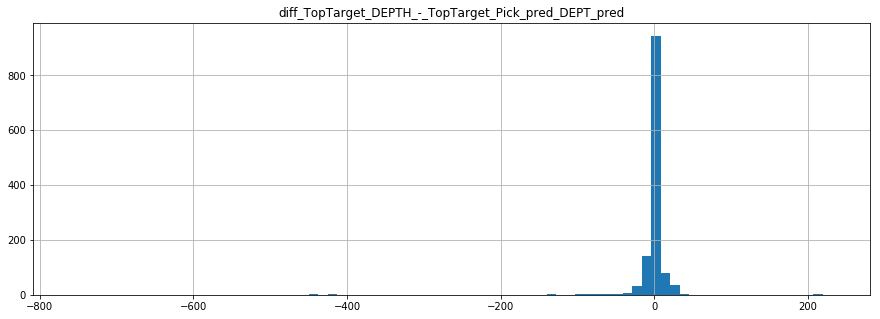

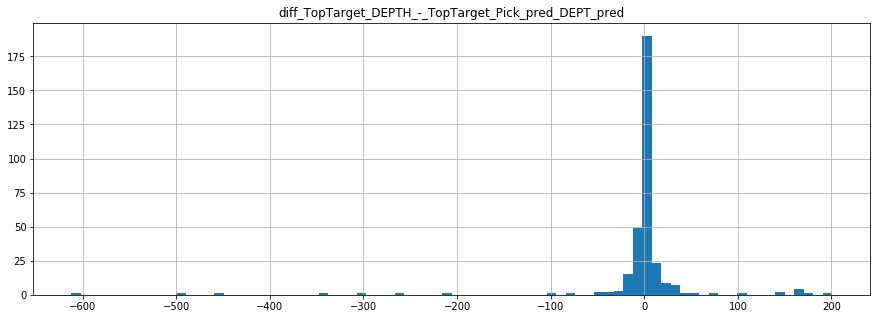

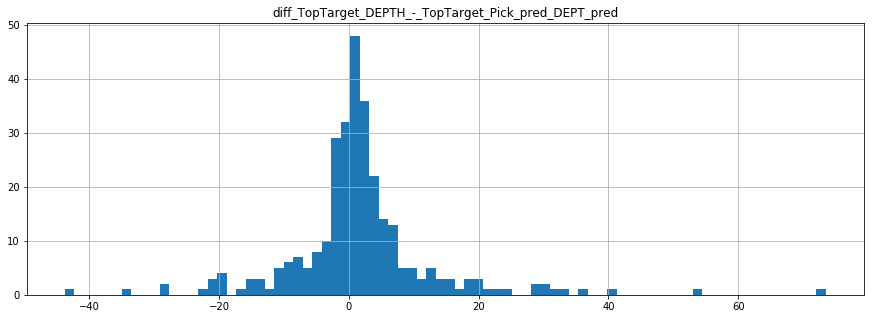

In [17]:
# -*- coding: utf-8 -*-
import predictionclasses 
from configurationplusfiles_runner import input_data_inst, config, output_data_inst
from main import getJobLibPickleResults



################## Load model & ML class instance from trainclasses step #############

# model = getJobLibPickleResults(output_data_inst,output_data_inst.path_trainclasses,"trainclasses_model.pkl")
# ML1 = getJobLibPickleResults(output_data_inst,output_data_inst.path_trainclasses,"trainclasses_ML1_instance.pkl")

model,ML1 =loadMLinstanceAndModel(output_data_inst)

print("the model imported is:",model)

################## Class Prediction Results for training dataframe for X #############

##### Creating a class_accuracy instance with the already established ML1 variable for an isntance of the ML_obj_class
ac = class_accuracy(ML1)


################## First with training data #############

#### Running the accuracy calculation using the model trained on training data against training data. 
#### Testing how well the model predicts the class of each point, with class being categorized distance from actual pick.
accuracy_train = ac.run_all(model,ac.train_X,ac.train_y,'TopTarget_Pick_pred','class_DistFrPick_TopTarget')

print("accuracy of training dataset",accuracy_train)


################## Then with test data ###############

#### Running the accuracy calculation using the model trained on training data against TEST data. 
#### Testing how well the model predicts the class of each point, with class being categorized distance from actual pick.
accuracy_test = ac.run_all(model,ac.test_X,ac.test_y,'TopTarget_Pick_pred','class_DistFrPick_TopTarget')

print("accuracy of test dataset",accuracy_test)


####################################### THIS IS TEST FOR ACCURACY OVER ALL ROWS, WHICH WE REALLY DON"T CARE ABOUT ##########
############ WE CARE ABOUT THE PICK ############################

# New class for functions that take in point by point distance class prediction and use rolling window and other methods to pick which point should be the top in question
# Make a few different columns classifiers that get the rolling mean of pick classifiers within different windows.
# This will help compare a class prediction of 95 in one part of the well to a class prediction of 95 in a nother part of the well. The assumption being the right prediction will have not just one 100 or 95 prediction but several in close proximity where as the false predictions are more likely to be by themselves:

#     Median
#     Rolling mean 6
#     Rolling mean 12
#     Rolling Mean 20
#     Sums of rolling all means


concatClass = InputDistClassPrediction_to_BestDepthForTop(output_data_inst)

concatClass.load_MLobj(ML1)

concatClass.help()

prediction_distClass_trainingData_ndarray = concatClass.predict_from_model(model,ML1.train_X)

concatClass1 = concatClass.concat_modelResultsNDArray_w_indexValues(concatClass.result_df_dist_class_prediction,"train",config.pick_class_str)


##### NEED TO PUT THIS LIST IN CONFIG ########## !!!!!!!
cols_to_keep_list = ['DEPT',"NN1_TopHelper_DEPTH","NN1_thickness","topTarget_Depth_predBy_NN1thick","DistFrom_NN1ThickPredTopDepth_toRowDept"]

concatClass2 = concatClass.concat_step2(ML1,"train",cols_to_keep_list)

#####
DEPTH_col_in_featureCreation = config.DEPTH_col_in_featureCreation
pick_class_str = config.pick_class_str
UWI = config.UWI
curve_windows_for_rolling_features = config.curve_windows_for_rolling_features
label_intergers = list(config.zonesAroundTops.keys())

distClassDF_wRollingCols_training = concatClass.calc_pred_vs_real_top_dif(concatClass.df_results_trainOrtest_wIndex,DEPTH_col_in_featureCreation,pick_class_str,UWI,curve_windows_for_rolling_features,label_intergers)


print("distClassDF_wRollingCols_training.head() = ",distClassDF_wRollingCols_training.head())

print("printing distClassDF_wRollingCols_training for checking that it makes sense::",distClassDF_wRollingCols_training.tail())

################ Now lets run test version   ################

concatClass_test = InputDistClassPrediction_to_BestDepthForTop(output_data_inst)


#####
DEPTH_col_in_featureCreation = config.DEPTH_col_in_featureCreation
pick_class_str = config.pick_class_str
UWI = config.UWI
curve_windows_for_rolling_features = config.curve_windows_for_rolling_features
label_intergers = list(config.zonesAroundTops.keys())



#### Doing it the 'all at once' way this time.
distClassDF_wRollingCols_testData = concatClass_test.run_all(ML1,model,"test",cols_to_keep_list,DEPTH_col_in_featureCreation,pick_class_str,UWI,curve_windows_for_rolling_features,label_intergers)

print("distClassDF_wRollingCols_testData.head()",distClassDF_wRollingCols_testData.head())

##################### The next part will attempt to go from classifiers of  ##################### 
#####################  (at, near, or far away from the pick in each well) to a single depth prediction for the pick in each well ###################### 
#####################  Class for calculating accuracy of single pick prediction in each well vs. #####################  
######################  known pick based on rolling average & median ranking of depths with distance class #####################  
#####################  predictions of being close to pick. #####################  

vs = {"depth_str":config.DEPTH_col_in_featureCreation,"pick_class_str":config.pick_class_str,"UWI_str" :config.UWI,"rollingWindows":config.curve_windows_for_rolling_features,"distClassIntegersArray" :list(config.zonesAroundTops.keys())}
print("vs",vs)
print("gap")
print("vs",vs["depth_str"])


#####################  Start accuracy_singleTopPerWellPrediction_fromRollingRules() class for training data  #####################  

rollToWell = accuracy_singleTopPerWellPrediction_fromRollingRules(ML1,vs,distClassDF_wRollingCols_training)

r2,mean_absolute_error_,df_calc_pred_Top_Pick_pred_DEPT_pred = rollToWell.run_all('TopTarget_Pick_pred_DEPT_pred','TopTarget_DEPTH',keepAllWells="yes",dropIfOnlyClasses=[0])


print("len(df_calc_pred_Top_Pick_pred_DEPT_pred",len(df_calc_pred_Top_Pick_pred_DEPT_pred))
print("r2 of training dataset in terms of pick depths = ",r2)
print("mean_absolute_error_ of training dataset in terms of pick depths = ",mean_absolute_error_)

print("percent of wells kept because they weren't just class zero in rollToWell function for training:",rollToWell.precentWellsKept)

#####################  Now accuracy for test dataset again via accuracy_singleTopPerWellPrediction_fromRollingRules()  #####################  

#####################  First we'll do it and keep all wells not matter whether or not they include any class predictions other than zero  #####################  
#####################  This will include some wells with some very bad predictions as there are not class predictions to go off of #####################  


rollToWell_test = accuracy_singleTopPerWellPrediction_fromRollingRules(ML1,vs,distClassDF_wRollingCols_testData)
r2_test,mean_absolute_error_test,df_calc_pred_Top_Pick_pred_DEPT_pred2 = rollToWell_test.run_all('TopTarget_Pick_pred_DEPT_pred','TopTarget_DEPTH',keepAllWells="yes",dropIfOnlyClasses=[0])

print("r2 for test and all wells kept is:",r2_test)
print("mean_absolute_error_test for test and all wells kept is:",mean_absolute_error_test)
print("percent wells kept for test and all wells kept is:",rollToWell_test.precentWellsKept)

#####################  Now let's try it for test dataset but exclude wells that only have a zero class prediction #####################  

rollToWell_test_NoZeros = accuracy_singleTopPerWellPrediction_fromRollingRules(ML1,vs,distClassDF_wRollingCols_testData)
r2_test_NoZeros ,mean_absolute_error_test_NoZeros ,df_calc_pred_Top_Pick_pred_DEPT_pred2_NoZeros  = rollToWell_test_NoZeros .run_all('TopTarget_Pick_pred_DEPT_pred','TopTarget_DEPTH',keepAllWells="no",dropIfOnlyClasses=[0])

print("r2 for test and wells excluded that only had zero class predicted is:",r2_test_NoZeros)
print("mean_absolute_error_test for test and wells excluded that only had zero class predicted is:",mean_absolute_error_test_NoZeros)
print("percent wells kept for test and wells excluded that only had zero class predicted is:",rollToWell_test_NoZeros.precentWellsKept)

number_of_wells_thrown_out = len(rollToWell_test_NoZeros.fullUWIsSet) - len(rollToWell_test_NoZeros.fullUWIsSet)*rollToWell_test_NoZeros.precentWellsKept

print("number of wells with only zeros predicted that were thrown out:",number_of_wells_thrown_out)




In [18]:
distClassDF_wRollingCols_testData

,class_DistFrPick_TopTarget,TopTarget_Pick_pred,class_DistFrPick_TopTarget,UWI,trainOrTest,TopTarget_DEPTH,DEPT,NN1_TopHelper_DEPTH,NN1_thickness,topTarget_Depth_predBy_NN1thick,DistFrom_NN1ThickPredTopDepth_toRowDept,TopTarget_Pick_pred_classRollMean5,TopTarget_Pick_pred_classRollMean7,TopTarget_Pick_pred_classRollMean11,TopTarget_Pick_pred_classRollMean21,TopTarget_Pick_predclassRollMeanSum,TopTarget_Pick_pred_DEPT_pred,TopTarget_Pick_pred_classRollMeanSum
0,0,0,0,00-04-15-081-09W4-0,test,424.28,243.84,490.0,46.0,431.32,187.48,0.0,0.000000,0.000000,0.000000,0.000000,425.84,475.000000
1,0,0,0,00-04-15-081-09W4-0,test,424.28,244.09,490.0,46.0,431.32,187.23,0.0,0.000000,0.000000,0.000000,0.000000,425.84,475.000000
2,0,0,0,00-04-15-081-09W4-0,test,424.28,244.34,490.0,46.0,431.32,186.98,0.0,0.000000,0.000000,0.000000,0.000000,425.84,475.000000
3,0,0,0,00-04-15-081-09W4-0,test,424.28,244.59,490.0,46.0,431.32,186.73,0.0,0.000000,0.000000,0.000000,0.000000,425.84,475.000000
4,0,0,0,00-04-15-081-09W4-0,test,424.28,244.84,490.0,46.0,431.32,186.48,0.0,0.000000,0.000000,0.000000,0.000000,425.84,475.000000
5,0,0,0,00-04-15-081-09W4-0,test,424.28,245.09,490.0,46.0,431.32,186.23,0.0,0.000000,0.000000,0.000000,0.000000,425.84,475.000000
6,0,0,0,00-04-15-081-09W4-0,test,424.28,245.34,490.0,46.0,431.32,185.98,0.0,0.000000,0.000000,0.000000,0.000000,425.84,475.000000
7,0,0,0,00-04-15-081-09W4-0,test,424.28,245.59,490.0,46.0,431.32,185.73,0.0,0.000000,0.000000,0.000000,0.000000,425.84,475.000000
8,0,0,0,00-04-15-081-09W4-0,test,424.28,245.84,490.0,46.0,431.32,185.48,0.0,0.000000,0.000000,0.000000,0.000000,425.84,475.000000
9,0,0,0,00-04-15-081-09W4-0,test,424.28,246.09,490.0,46.0,431.32,185.23,0.0,0.000000,0.000000,0.000000,0.000000,425.84,475.000000


In [24]:
distClassDF_wRollingCols_testData

,class_DistFrPick_TopTarget,TopTarget_Pick_pred,class_DistFrPick_TopTarget,UWI,trainOrTest,TopTarget_DEPTH,DEPT,NN1_TopHelper_DEPTH,NN1_thickness,topTarget_Depth_predBy_NN1thick,DistFrom_NN1ThickPredTopDepth_toRowDept,TopTarget_Pick_pred_classRollMean5,TopTarget_Pick_pred_classRollMean7,TopTarget_Pick_pred_classRollMean11,TopTarget_Pick_pred_classRollMean21,TopTarget_Pick_predclassRollMeanSum,TopTarget_Pick_pred_DEPT_pred,TopTarget_Pick_pred_classRollMeanSum
0,0,0,0,00-04-15-081-09W4-0,test,424.28,243.84,490.0,46.0,431.32,187.48,0.0,0.000000,0.000000,0.000000,0.000000,425.84,475.000000
1,0,0,0,00-04-15-081-09W4-0,test,424.28,244.09,490.0,46.0,431.32,187.23,0.0,0.000000,0.000000,0.000000,0.000000,425.84,475.000000
2,0,0,0,00-04-15-081-09W4-0,test,424.28,244.34,490.0,46.0,431.32,186.98,0.0,0.000000,0.000000,0.000000,0.000000,425.84,475.000000
3,0,0,0,00-04-15-081-09W4-0,test,424.28,244.59,490.0,46.0,431.32,186.73,0.0,0.000000,0.000000,0.000000,0.000000,425.84,475.000000
4,0,0,0,00-04-15-081-09W4-0,test,424.28,244.84,490.0,46.0,431.32,186.48,0.0,0.000000,0.000000,0.000000,0.000000,425.84,475.000000
5,0,0,0,00-04-15-081-09W4-0,test,424.28,245.09,490.0,46.0,431.32,186.23,0.0,0.000000,0.000000,0.000000,0.000000,425.84,475.000000
6,0,0,0,00-04-15-081-09W4-0,test,424.28,245.34,490.0,46.0,431.32,185.98,0.0,0.000000,0.000000,0.000000,0.000000,425.84,475.000000
7,0,0,0,00-04-15-081-09W4-0,test,424.28,245.59,490.0,46.0,431.32,185.73,0.0,0.000000,0.000000,0.000000,0.000000,425.84,475.000000
8,0,0,0,00-04-15-081-09W4-0,test,424.28,245.84,490.0,46.0,431.32,185.48,0.0,0.000000,0.000000,0.000000,0.000000,425.84,475.000000
9,0,0,0,00-04-15-081-09W4-0,test,424.28,246.09,490.0,46.0,431.32,185.23,0.0,0.000000,0.000000,0.000000,0.000000,425.84,475.000000


Number of test wells

In [27]:
len(distClassDF_wRollingCols_testData["UWI"].unique())

321

Number of training wells

In [29]:

len(distClassDF_wRollingCols_training["UWI"].unique())

1280

Number of wells in test group not predicted for because they were too different and only had class predictions of zero

In [30]:
number_of_wells_thrown_out 

22.0

In [32]:
df_calc_pred_Top_Pick_pred_DEPT_pred2_NoZeros

,UWI,TopTarget_Pick_pred_DEPT_pred,diff_TopTarget_DEPTH_-_TopTarget_Pick_pred_DEPT_pred,TopTarget_DEPTH
0,00-01-21-084-17W4-0,261.201,1.799,263.00
1,00-01-25-083-02W4-0,179.500,41.000,220.50
2,00-02-02-083-11W4-0,460.000,-4.000,456.00
3,00-02-06-074-04W5-0,594.500,1.500,596.00
4,00-02-22-071-22W4-0,586.000,7.500,593.50
5,00-02-26-073-05W5-0,588.750,-8.750,580.00
6,00-03-05-075-02W5-0,588.500,53.500,642.00
7,00-03-12-095-16W4-0,294.750,-0.750,294.00
8,00-03-18-072-06W4-0,474.000,0.000,474.00
9,00-03-25-083-02W5-0,458.000,10.000,468.00


In [125]:
# -*- coding: utf-8 -*-




########## imports ########
import os
import folium
#print(folium.__version__)
import branca.colormap as cm
from branca.utilities import color_brewer
import os
import math
#env = %env
#pd.set_option('display.max_rows', 2000)

center2 = [54.840471, -110.269399]
zoom2 = 6



linear2 = cm.LinearColormap(
    ['#edf8b1','#7fcdbb','#2c7fb8','#273891'],
    vmin=-100, vmax=75
)

print(linear2)

def depth_color(depth):
    if(math.isnan(depth)):
        print(" math.isnan(depth) => ", depth)
        return 'blue'
    else:
        depth = float(depth)
#         if depth >= 50:
#             color = '#3182bd'
#         elif depth > 10 and depth < 50:
#             color = '#9ecae1'
#         elif depth > -10 and depth < 10:
#             color = 'green'
#         elif depth > -50 and depth < -10:
#             color = '#ffeda0'
#         elif depth > -150 and depth < -50:
#             color = '#feb24c'
#         elif depth > -300 and depth < -150:
#             color = '#f03b20'
#         else:
#             color = 'blue'

        if depth <= 50 and depth > 15:
            color = 'yellow'
            #color = "#f6eff7"
            #color = '#3182bd'
        elif depth > 3 and depth < 15:
            color = "#d0d1e6"
#             color = '#9ecae1'
        elif depth > -3 and depth < 3:
            color = 'green'
            #color = "#a6bddb"
        elif depth > -15 and depth < -3:
            color = "#67a9cf"
            #color = '#ffeda0'
        elif depth > -50 and depth < -15:
            color = 'orange'
            #color = "#1c9099"
            #color = '#feb24c'
        elif depth > -300 and depth < -50:
            color = 'red'
            #color = "#016c59"
            #color = '#f03b20'
        else:
            color = 'red'
    return color

def depth_color3(depth,colorMap):
    if(math.isnan(depth)):
        print("!!!!!!!!!!!!!!!!!!!!  ' '  or nan is in depth => ", depth)
        color = '#000000'
    else:
        depth = float(depth)
        print("depth in colormap 3",depth)
        color = colorMap(depth)
        
    print("color = ",color)    
    return color


# import branca.colormap as cm
# colormap = cm.linear.Set1.scale(0, 35).to_step(10)
# colormap.caption = 'A colormap caption'
# m.add_child(colormap)

def makeMap_3(no_zeros_df,lat_col_int,long_col_int,depth_col_int,uwi_col_int):
    m5 = folium.Map(center2, tiles='Stamen Toner', zoom_start=zoom2,control_scale = True)
    list_df_for_map = no_zeros_df.values.tolist()
    m5.add_child(folium.map.LayerControl())
    for row in list_df_for_map[0:]:
        print(row)
        lat = row[lat_col_int:lat_col_int+1][0]
        long = row[long_col_int:long_col_int+1][0]
        uwi = row[uwi_col_int:uwi_col_int+1][0]
        depth = row[depth_col_int:depth_col_int+1][0]
        print("location = ",lat,long," and depth is",depth, " and UWI is ",uwi)
        folium.CircleMarker(
            location=[lat,long],
            radius=2,
            color=depth_color(depth),
            #color=color_brewer("PuBuGn"),
            fill=True,
            popup=folium.Popup(str(depth)+ " depth Top McMurray=", parse_html=True)    
            #popup=folium.Popup(uwi+", UWI=", parse_html=True)
        ).add_to(m5)
#     import branca.colormap as cm
#     colormap = ['blue','green','red']
#     colormap.caption = 'A colormap caption'
    #m5.add_child(colormap)
    
    return m5

def saveFoliumMap(map_m5):
    map_m5.save(os.path.join('.', 'MM_Top_Depth_Real_v_predBy_NN1thick_v2.html'))

In [49]:
from wellsKNN import get_data_for_wellsKNN

In [50]:
picks, picks_dic, wells, gis  = get_data_for_wellsKNN(input_data_inst)

In [51]:
gis

,SitID,UWI (AGS),UWI,HorID,Pick,Quality,lat,lng
0,102496,0674010812000,00/12-08-067-01W4/0,13000,475,3,54.785907,-110.129320
1,102497,0674020807000,00/07-08-067-02W4/0,13000,515,3,54.782284,-110.269446
2,102498,0674021109000,00/09-11-067-02W4/0,13000,480,3,54.785892,-110.186851
3,102500,0674022910000,00/10-29-067-02W4/0,13000,549,3,54.829624,-110.269422
4,102501,0674023406000,00/06-34-067-02W4/0,13000,529,2,54.840471,-110.224832
5,102503,0674030411000,00/11-04-067-03W4/0,13000,488.5,2,54.771449,-110.402983
6,102505,0674030810000,00/10-08-067-03W4/0,13000,501.5,2,54.785901,-110.422131
7,102507,0674031410000,00/10-14-067-03W4/0,13000,553.5,2,54.800533,-110.345762
8,102514,0674032810000,00/10-28-067-03W4/0,13000,493.5,3,54.829633,-110.396621
9,102517,0674033607000,00/07-36-067-03W4/0,13000,536.5,2,54.840441,-110.320301


In [52]:
gis["UWI"] = gis["UWI"].str.replace("/","-")

In [53]:
gis

,SitID,UWI (AGS),UWI,HorID,Pick,Quality,lat,lng
0,102496,0674010812000,00-12-08-067-01W4-0,13000,475,3,54.785907,-110.129320
1,102497,0674020807000,00-07-08-067-02W4-0,13000,515,3,54.782284,-110.269446
2,102498,0674021109000,00-09-11-067-02W4-0,13000,480,3,54.785892,-110.186851
3,102500,0674022910000,00-10-29-067-02W4-0,13000,549,3,54.829624,-110.269422
4,102501,0674023406000,00-06-34-067-02W4-0,13000,529,2,54.840471,-110.224832
5,102503,0674030411000,00-11-04-067-03W4-0,13000,488.5,2,54.771449,-110.402983
6,102505,0674030810000,00-10-08-067-03W4-0,13000,501.5,2,54.785901,-110.422131
7,102507,0674031410000,00-10-14-067-03W4-0,13000,553.5,2,54.800533,-110.345762
8,102514,0674032810000,00-10-28-067-03W4-0,13000,493.5,3,54.829633,-110.396621
9,102517,0674033607000,00-07-36-067-03W4-0,13000,536.5,2,54.840441,-110.320301


In [54]:
df_calc_pred_Top_Pick_pred_DEPT_pred2_NoZeros_withLatLong = (pd.merge(gis, df_calc_pred_Top_Pick_pred_DEPT_pred2_NoZeros, on='UWI'))

In [55]:
df_calc_pred_Top_Pick_pred_DEPT_pred2_NoZeros_withLatLong

,SitID,UWI (AGS),UWI,HorID,Pick,Quality,lat,lng,TopTarget_Pick_pred_DEPT_pred,diff_TopTarget_DEPTH_-_TopTarget_Pick_pred_DEPT_pred,TopTarget_DEPTH
0,102497,0674020807000,00-07-08-067-02W4-0,13000,515,3,54.782284,-110.269446,526.500,-11.500,515.00
1,102505,0674030810000,00-10-08-067-03W4-0,13000,501.5,2,54.785901,-110.422131,507.500,-6.000,501.50
2,102507,0674031410000,00-10-14-067-03W4-0,13000,553.5,2,54.800533,-110.345762,541.500,12.000,553.50
3,102514,0674032810000,00-10-28-067-03W4-0,13000,493.5,3,54.829633,-110.396621,496.000,-2.500,493.50
4,102517,0674033607000,00-07-36-067-03W4-0,13000,536.5,2,54.840441,-110.320301,555.750,-19.250,536.50
5,102518,0674040210000,00-10-02-067-04W4-0,13000,528,1,54.771451,-110.498414,518.750,9.250,528.00
6,102583,0674050313000,00-13-03-067-05W4-0,13000,487,2,54.775090,-110.688675,491.000,-4.000,487.00
7,102610,0674070511000,00-11-05-067-07W4-0,13000,473,1,54.771468,-111.038407,477.250,-4.250,473.00
8,102615,0674072908000,00-08-29-067-07W4-0,13000,526,3,54.826041,-111.025865,528.000,-2.000,526.00
9,163612,0674103109000,00-09-31-067-10W4-0,13000,523,2,54.844056,-111.508948,521.500,1.500,523.00


In [126]:
map_3_test_no_zeros = makeMap_3(df_calc_pred_Top_Pick_pred_DEPT_pred2_NoZeros_withLatLong,6,7,9,2)

[102497, '0674020807000', '00-07-08-067-02W4-0', 13000, '515', 3, 54.782284, -110.269446, 526.5, -11.5, 515.0]
location =  54.782284 -110.269446  and depth is -11.5  and UWI is  00-07-08-067-02W4-0
[102505, '0674030810000', '00-10-08-067-03W4-0', 13000, '501.5', 2, 54.785901, -110.42213100000001, 507.5, -6.0, 501.5]
location =  54.785901 -110.42213100000001  and depth is -6.0  and UWI is  00-10-08-067-03W4-0
[102507, '0674031410000', '00-10-14-067-03W4-0', 13000, '553.5', 2, 54.800532999999994, -110.34576200000001, 541.5, 12.0, 553.5]
location =  54.800532999999994 -110.34576200000001  and depth is 12.0  and UWI is  00-10-14-067-03W4-0
[102514, '0674032810000', '00-10-28-067-03W4-0', 13000, '493.5', 3, 54.829632999999994, -110.396621, 496.0, -2.5, 493.5]
location =  54.829632999999994 -110.396621  and depth is -2.5  and UWI is  00-10-28-067-03W4-0
[102517, '0674033607000', '00-07-36-067-03W4-0', 13000, '536.5', 2, 54.840441000000006, -110.320301, 555.75, -19.25, 536.5]
location =  54.8

[105909, '0704271211000', '00-11-12-070-27W4-0', 13000, '679.7', 2, 55.048168999999994, -113.987447, 675.1419999999947, 4.558000000000902, 679.6999999999956]
location =  55.048168999999994 -113.987447  and depth is 4.558000000000902  and UWI is  00-11-12-070-27W4-0
[105917, '0705013211000', '00-11-32-070-01W5-0', 13000, '622.5', 2, 55.106837, -114.11968, 630.25, -7.75, 622.5]
location =  55.106837 -114.11968  and depth is -7.75  and UWI is  00-11-32-070-01W5-0
[105920, '0705021110000', '00-10-11-070-02W5-0', 13000, '640', 1, 55.048675, -114.18963899999999, 632.25, 7.75, 640.0]
location =  55.048675 -114.18963899999999  and depth is 7.75  and UWI is  00-10-11-070-02W5-0
[105926, '0705023615000', '00-15-36-070-02W5-0', 13000, '614', 1, 55.110387, -114.164345, 613.25, 0.75, 614.0]
location =  55.110387 -114.164345  and depth is 0.75  and UWI is  00-15-36-070-02W5-0
[105929, '0705030304000', '00-04-03-070-03W5-0', 13000, '697', 1, 55.02706, -114.379929, 688.25, 8.75, 697.0]
location =  55.

[107385, '0724203511000', '00-11-35-072-20W4-0', 13000, '536', 1, 55.28091800000001, -112.971153, 543.75, -7.75, 536.0]
location =  55.28091800000001 -112.971153  and depth is -7.75  and UWI is  00-11-35-072-20W4-0
[107407, '0724240110000', '00-10-01-072-24W4-0', 13000, '629', 1, 55.208211999999996, -113.554585, 629.0, 0.0, 629.0]
location =  55.208211999999996 -113.554585  and depth is 0.0  and UWI is  00-10-01-072-24W4-0
[107468, '0725033611000', '00-11-36-072-03W5-0', 13000, '614', 2, 55.281279000000005, -114.325635, 615.75, -1.75, 614.0]
location =  55.281279000000005 -114.325635  and depth is -1.75  and UWI is  00-11-36-072-03W5-0
[107948, '0734053507000', '00-07-35-073-05W4-0', 13000, '439', 1, 55.364557999999995, -110.657028, 455.0, -16.0, 439.0]
location =  55.364557999999995 -110.657028  and depth is -16.0  and UWI is  00-07-35-073-05W4-0
[107997, '0734071006000', '00-06-10-073-07W4-0', 13000, '527', 1, 55.306424, -110.996903, 521.25, 5.75, 527.0]
location =  55.306424 -110.99

[109323, '0754162507000', '00-07-25-075-16W4-0', 13000, '562.36', 2, 55.524587, -112.34433600000001, 558.6060000000127, 3.7539999999772817, 562.35999999999]
location =  55.524587 -112.34433600000001  and depth is 3.7539999999772817  and UWI is  00-07-25-075-16W4-0
[109355, '0754233607000', '00-07-36-075-23W4-0', 13000, '580.34', 1, 55.538971, -113.43113400000001, 573.2299999999941, 7.11000000001593, 580.34000000001]
location =  55.538971 -113.43113400000001  and depth is 7.11000000001593  and UWI is  00-07-36-075-23W4-0
[109375, '0754253211000', '00-11-32-075-25W4-0', 13000, '646.18', 2, 55.542616, -113.85162, 645.5459999999887, 0.6340000000053578, 646.179999999994]
location =  55.542616 -113.85162  and depth is 0.6340000000053578  and UWI is  00-11-32-075-25W4-0
[163993, '0755020503000', '00-03-05-075-02W5-0', 13000, '642', 1, 55.463196999999994, -114.276233, 588.5, 53.5, 642.0]
location =  55.463196999999994 -114.276233  and depth is 53.5  and UWI is  00-03-05-075-02W5-0
[109853, '07

[111051, '0784133406000', '00-06-34-078-13W4-0', 13000, '443', 3, 55.800808999999994, -111.93671299999998, 441.25, 1.75, 443.0]
location =  55.800808999999994 -111.93671299999998  and depth is 1.75  and UWI is  00-06-34-078-13W4-0
[111053, '0784142210000', '00-10-22-078-14W4-0', 13000, '468', 1, 55.775335999999996, -112.085572, 466.75, 1.25, 468.0]
location =  55.775335999999996 -112.085572  and depth is 1.25  and UWI is  00-10-22-078-14W4-0
[111099, '0784223611000', '00-11-36-078-22W4-0', 13000, '407.21', 1, 55.804347, -113.28226599999999, 408.8599999999914, -1.6499999999879265, 407.21000000000345]
location =  55.804347 -113.28226599999999  and depth is -1.6499999999879265  and UWI is  00-11-36-078-22W4-0
[111105, '0784233004000', '00-04-30-078-23W4-0', 13000, '475', 1, 55.782743, -113.57325700000001, 471.0, 4.0, 475.0]
location =  55.782743 -113.57325700000001  and depth is 4.0  and UWI is  00-04-30-078-23W4-0
[111108, '0784233410000', '00-10-34-078-23W4-0', 13000, '448.06', 1, 55.80

location =  56.04809 -111.09191899999999  and depth is 0.25  and UWI is  00-06-30-081-07W4-0
[113044, '0814091504000', '00-04-15-081-09W4-0', 13000, '424.28', 3, 56.01544499999999, -111.333199, 425.84000000000754, -1.559999999997956, 424.2800000000096]
location =  56.01544499999999 -111.333199  and depth is -1.559999999997956  and UWI is  00-04-15-081-09W4-0
[164514, '0814121809000', '00-09-18-081-12W4-0', 13000, '468', 1, 56.022597999999995, -111.86211999999999, 478.0, -10.0, 468.0]
location =  56.022597999999995 -111.86211999999999  and depth is -10.0  and UWI is  00-09-18-081-12W4-0
[113069, '0814142610AA0', 'AA-10-26-081-14W4-0', 13000, '339', 1, 56.051677000000005, -112.07739699999999, 338.29699999999855, 0.7030000000014525, 339.0]
location =  56.051677000000005 -112.07739699999999  and depth is 0.7030000000014525  and UWI is  AA-10-26-081-14W4-0
[154240, '0814153510000', '00-10-35-081-15W4-0', 13000, '321', 3, 56.066128000000006, -112.234008, 314.5, 6.5, 321.0]
location =  56.066

[114893, '0844233310000', '00-10-33-084-23W4-0', 13000, '388.92', 1, 56.328084999999994, -113.571226, 375.1300000000034, 13.789999999997804, 388.9200000000012]
location =  56.328084999999994 -113.571226  and depth is 13.789999999997804  and UWI is  00-10-33-084-23W4-0
[143685, '0854060615AA0', 'AA-15-06-085-06W4-0', 13000, '233.5', 1, 56.34630799999999, -110.93763899999999, 248.80199999999792, -15.301999999997918, 233.5]
location =  56.34630799999999 -110.93763899999999  and depth is -15.301999999997918  and UWI is  AA-15-06-085-06W4-0
[115468, '0854121511AA0', 'AA-11-15-085-12W4-0', 13000, '233', 1, 56.3718, -111.81315, 225.70199999999963, 7.298000000000371, 233.0]
location =  56.3718 -111.81315  and depth is 7.298000000000371  and UWI is  AA-11-15-085-12W4-0
[115469, '0854122407AA0', 'AA-07-24-085-12W4-0', 13000, '233.78', 2, 56.382619999999996, -111.75398100000001, 229.20799999999895, 4.572000000000088, 233.77999999999903]
location =  56.382619999999996 -111.75398100000001  and dept

[125119, '0974073210AA0', 'AA-10-32-097-07W4-0', 13000, '16.5', 2, 57.462561, -111.100167, 25.75, -9.25, 16.5]
location =  57.462561 -111.100167  and depth is -9.25  and UWI is  AA-10-32-097-07W4-0
[125150, '0974080404AA0', 'AA-04-04-097-08W4-0', 13000, '3', 3, 57.382728, -111.248855, 31.0, -28.0, 3.0]
location =  57.382728 -111.248855  and depth is -28.0  and UWI is  AA-04-04-097-08W4-0
[125562, '0974122913AA0', 'AA-13-29-097-12W4-0', 13000, '167', 2, 57.451696999999996, -111.9258, 164.5, 2.5, 167.0]
location =  57.451696999999996 -111.9258  and depth is 2.5  and UWI is  AA-13-29-097-12W4-0
[125751, '0984100601AA0', 'AA-01-06-098-10W4-0', 13000, '5', 2, 57.469961, -111.608076, 19.5, -14.5, 5.0]
location =  57.469961 -111.608076  and depth is -14.5  and UWI is  AA-01-06-098-10W4-0
[126071, '0994142902AA0', 'AA-02-29-099-14W4-0', 13000, '530.5', 2, 57.615337, -112.25944299999999, 530.5, 0.0, 530.5]
location =  57.615337 -112.25944299999999  and depth is 0.0  and UWI is  AA-02-29-099-14W

In [127]:
map_3_test_no_zeros